### This is EDA of movies dataset, that I found in Kaggle(the link below), and have done some ETL previously.
https://www.kaggle.com/rounakbanik/the-movies-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\Gev\Desktop\Data science\Movies\EDA\EDA_data.csv'

In [3]:
df = pd.read_csv(path, index_col = 0, header = 0)

In [4]:
pd.set_option('display.max_columns', None)

#### Lets start with some tO_Do list

In [5]:
#Df partial view
#Df info
#Df shape
#Df Descriptive Statistics (Mean, Minimum, Maximum)
#Variables distributions
#Variable correlations

In [6]:
#Df partial view
#Df shape

print('DataFrame shape is {}'.format(df.shape))
print('\nDataFrame partial view:')
df.head()

DataFrame shape is (45107, 29)

DataFrame partial view:


,budget,movieId,popularity,production_companies,release_date,revenue,runtime,title,release_year,Drama,Comedy,Action,Documentary,Horror,Crime,Thriller,Adventure,Romance,Animation,Fantasy,Science Fiction,Mystery,Family,Music,Western,TV Movie,War,History,Foreign
0,30.0,862,22.0,other,1995-10-30,373.55,81.0,Toy Story,1995,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,65.0,8844,17.0,other,1995-12-15,262.80,104.0,Jumanji,1995,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,0.0,15602,12.0,Warner Bros.,1995-12-22,0.00,101.0,Grumpier Old Men,1995,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,16.0,31357,4.0,Twentieth Century Fox Film Corporation,1995-12-22,81.45,127.0,Waiting to Exhale,1995,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,11862,8.0,other,1995-02-10,76.58,106.0,Father of the Bride Part II,1995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#Df info about columns names, null values(no null values, beacues I did some ETL) and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45107 entries, 0 to 45465
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45107 non-null  float64
 1   movieId               45107 non-null  int64  
 2   popularity            45107 non-null  float64
 3   production_companies  45107 non-null  object 
 4   release_date          45107 non-null  object 
 5   revenue               45107 non-null  float64
 6   runtime               45107 non-null  float64
 7   title                 45107 non-null  object 
 8   release_year          45107 non-null  int64  
 9   Drama                 45107 non-null  int64  
 10  Comedy                45107 non-null  int64  
 11  Action                45107 non-null  int64  
 12  Documentary           45107 non-null  int64  
 13  Horror                45107 non-null  int64  
 14  Crime                 45107 non-null  int64  
 15  Thriller           

In [8]:
#Df Descriptive Statistics (Mean, Minimum, Maximum)

#Columns 9 to 28 are just categorical data, so I'll look at them later
df.describe().iloc[:,:6]

,budget,movieId,popularity,revenue,runtime,release_year
count,45107.000000,45107.000000,45107.000000,45107.000000,45107.000000,45107.000000
mean,4.256454,107203.669630,2.916864,11.296080,94.178686,1991.855943
std,17.488506,111597.754465,6.039294,64.575722,38.346542,24.072635
min,0.000000,2.000000,0.000000,0.000000,0.000000,1874.000000
25%,0.000000,26273.000000,0.000000,0.000000,85.000000,1978.000000
50%,0.000000,59249.000000,1.000000,0.000000,95.000000,2001.000000
75%,0.000000,153646.500000,4.000000,0.000000,107.000000,2010.000000
max,380.000000,469172.000000,547.000000,2787.970000,1256.000000,2020.000000


In [9]:
#From here, we already can extract some useful information, like average runtime of moveis, avearage budget, 
#quartiles and so on.
#But this insights better be visualized in some beautiful way

In [10]:
#Variables distributions

num_columns = ['budget', 'popularity', 'revenue', 'runtime']

In [11]:
#As we can see from desrciptive statistics even 75 procentile for 'budget' is 0, so there is a lot of 0's in this column
#Beacuse of this I'll use non 0 values for building histograms

In [12]:
#As there is a huge range difference between min and max values I'll draw plots using 90 procentile to set axis x limit

def draw_hist(series, name):
    '''
    Draws sns.hist with xlim(0, 95 procentile) 
    '''
    series = series.loc[series != 0]
    sorted = series.sort_values()
    procentile = sorted.iloc[int(0.9 * sorted.size)]
    
    hist = sns.distplot(series[series < procentile])
    hist.set_xlim((0, procentile))
    hist.set_title('{} distribution'.format(name), fontsize = 12)
    plt.show()
    
    return 

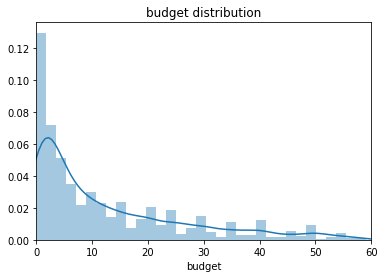

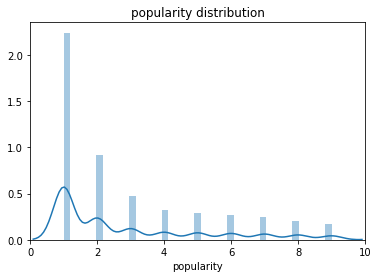

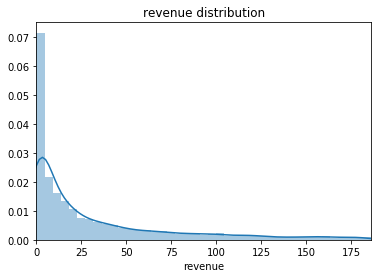

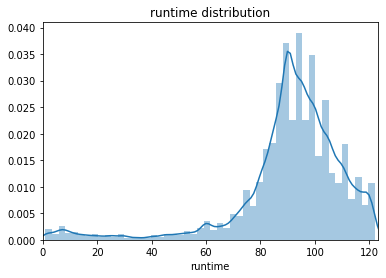

In [13]:
for i in range(4):
    draw_hist(df[num_columns[i]], num_columns[i])
    plt.show()

In [14]:
#Variable correlations

In [15]:
#Since we already have num features lets start with them

In [16]:
corr = df[num_columns].corr()

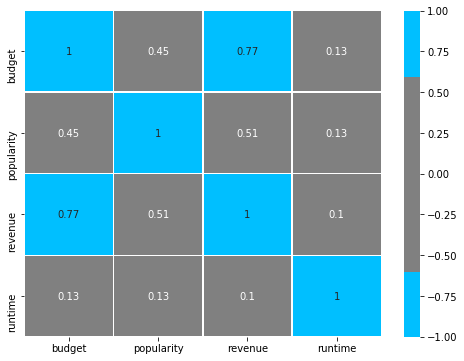

In [17]:
plt.figure(figsize = (8,6))

cmap = ['deepskyblue', 'gray', 'gray', 'gray', 'deepskyblue']
sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)

plt.show()

In [18]:
#So you  see from here, that there is some correlation beetwen revenue and budget, which makes sense.
#But, what is interesting, relation between popularity and revenue is not so strong, as I assumed.

In [19]:
#As there are a lot of 0s in this dataset, and this gives ground to doubt. So I'll drop 0 values and see what will change

In [20]:
test = df[num_columns].copy()
test.shape

(45107, 4)

In [21]:
test.describe()

,budget,popularity,revenue,runtime
count,45107.000000,45107.000000,45107.000000,45107.000000
mean,4.256454,2.916864,11.296080,94.178686
std,17.488506,6.039294,64.575722,38.346542
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,85.000000
50%,0.000000,1.000000,0.000000,95.000000
75%,0.000000,4.000000,0.000000,107.000000
max,380.000000,547.000000,2787.970000,1256.000000


In [22]:
test = test.loc[test['budget'] > 0 ]

In [23]:
test.describe()

,budget,popularity,revenue,runtime
count,8590.000000,8590.000000,8590.000000,8590.000000
mean,22.351093,7.552852,56.550129,105.827125
std,34.665672,11.571871,138.566150,27.847719
min,0.010000,0.000000,0.000000,0.000000
25%,2.300000,2.000000,0.000000,92.000000
50%,9.000000,7.000000,4.390000,102.000000
75%,26.000000,10.000000,48.052500,116.000000
max,380.000000,547.000000,2787.970000,705.000000


In [24]:
test.shape

(8590, 4)

In [25]:
#From here we can conclude, that most of rows that contains 0 in budget also contains 0 in revenue, which is some kind of 
#possitive, becaues we don`t lose inforamtion by droping this rows

In [26]:
test = test.loc[test['revenue'] > 0 ]

In [27]:
test.shape

(5295, 4)

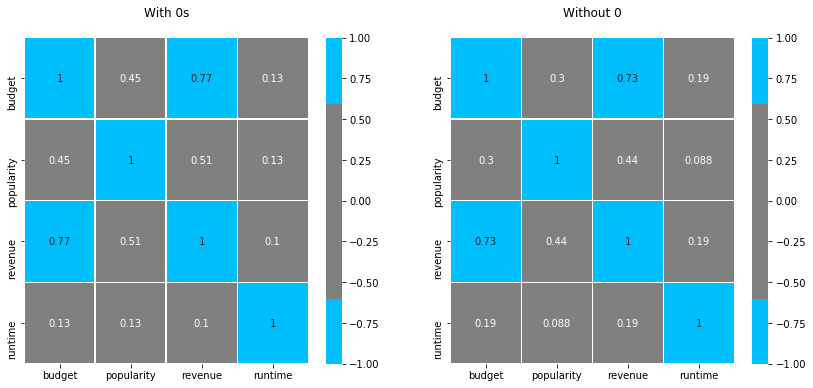

In [28]:
fig, (axis1, axis2)= plt.subplots(1,2, figsize = (14,6))

axis1 = sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap, ax = axis1)
axis1.set_title('With 0s\n', fontsize = 12)

axis2 = sns.heatmap(test.corr(), linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap, ax = axis2)
axis2.set_title('Without 0\n', fontsize = 12)

plt.show()

In [29]:
#Like we can see, almost all values decreased. It can be beacuse of relatilvly small dataset(5295 vs 45107) or 
#it can be more clear interpretation of the real situation

In [30]:
#For more coplex analyse we need to look at some scatter plots

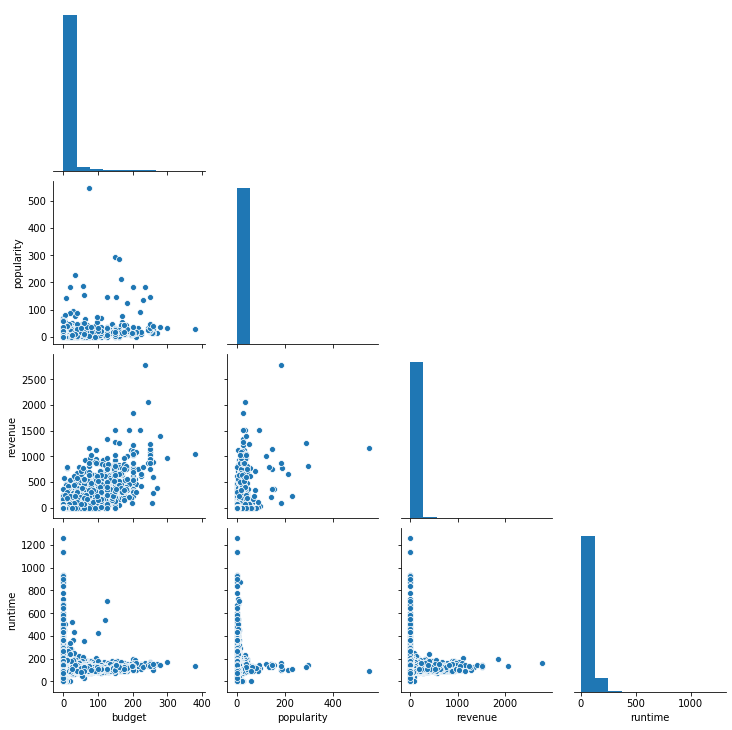

In [31]:
sns.pairplot(df[num_columns], palette = 'deepskyblue', corner = True)
plt.show()

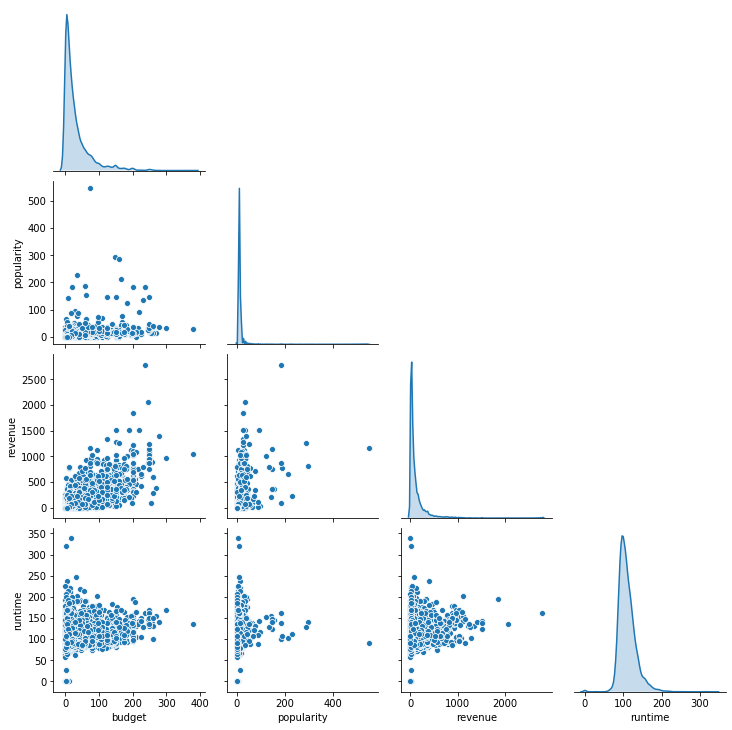

In [32]:
sns.pairplot(test, palette = 'deepskyblue', diag_kind = 'kde', corner = True)
plt.show()

## Categorical analysis

In [33]:
#Categorical anlysis

In [34]:
#Lest see if there is some relation between movie genres

In [35]:
cat = df.iloc[:,9:]

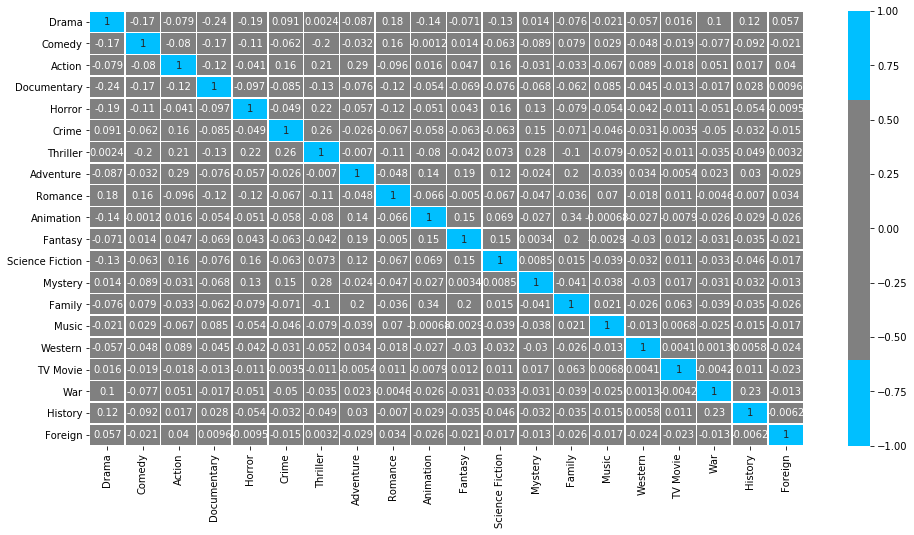

In [36]:
plt.figure(figsize = (16,8))
sns.heatmap(cat.corr(), cmap = cmap, linewidth = 0.5, annot = True, vmin = -1, vmax = 1, center = 0)
plt.show()

In [37]:
#As expected, there is no significant relation between genres

In [38]:
#Revenue of each genre barplot / Most profitable genre

In [39]:
total_rev = []
genres = df.columns[9:]

for genre in genres:
    total = df.loc[df[genre] == 1]['revenue'].sum()
    total_rev.append(int(total))

In [40]:
rev_barplot_df = pd.DataFrame(index = genres, data = total_rev, columns = ['total_rev'])
rev_barplot_df = rev_barplot_df.sort_values(by = 'total_rev', ascending = False)
rev_barplot_df.head()

,total_rev
Action,201456
Adventure,200080
Comedy,166892
Drama,160842
Thriller,129782


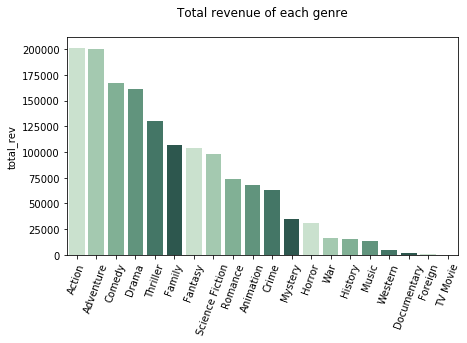

In [41]:
plt.figure(figsize = (7,4))

rev_barplot = sns.barplot(data = rev_barplot_df, x = rev_barplot_df.index, y = 'total_rev', 
                          palette = sns.color_palette("ch:2.5,-.2,dark=.3"))
rev_barplot.set_title('Total revenue of each genre\n', fontsize = 12)

plt.xticks(rotation = 70)
plt.show()

In [42]:
#Popularity of each genre

In [43]:
total_pop = []

for genre in genres:
    pop = df[genre].value_counts().loc[1]
    total_pop.append(pop)

In [44]:
pop_barplot_df = pd.DataFrame(data = total_pop, index = genres, columns = ['total_pop'])
pop_barplot_df = pop_barplot_df.sort_values(by = 'total_pop', ascending  = False)
pop_barplot_df.head()

,total_pop
Drama,20185
Comedy,13089
Thriller,7605
Romance,6717
Action,6580


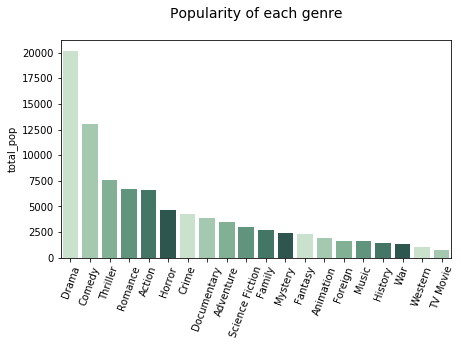

In [45]:
plt.figure(figsize = (7,4))

pop_barplot = sns.barplot(data = pop_barplot_df, x = pop_barplot_df.index, y = 'total_pop', 
                          palette = sns.color_palette("ch:2.5,-.2,dark=.3"))
pop_barplot.set_title('Popularity of each genre\n', fontsize = 14)

plt.xticks(rotation = 70)
plt.show()

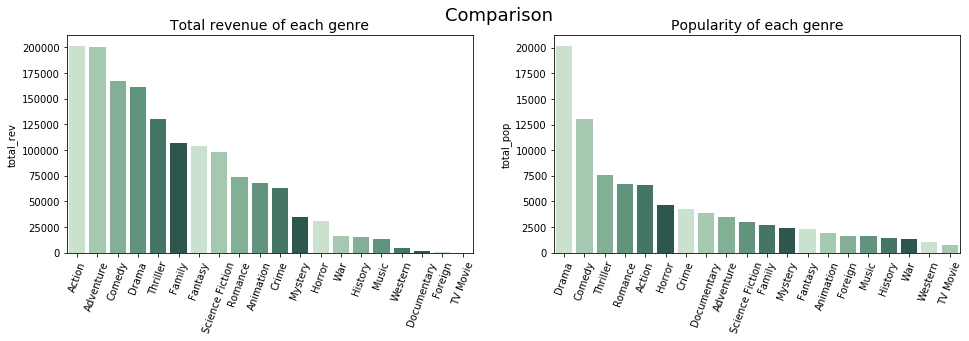

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
fig.suptitle('Comparison', fontsize = 18)

ax1 = sns.barplot(data = rev_barplot_df, x = rev_barplot_df.index, y = 'total_rev', 
                                                                   palette = sns.color_palette("ch:2.5,-.2,dark=.3"), ax = ax1)
ax1.set_xticklabels(labels = rev_barplot_df.index, rotation = 70)
ax1.set_title('Total revenue of each genre', fontsize = 14)


ax2 = sns.barplot(data = pop_barplot_df, x = pop_barplot_df.index, y = 'total_pop', 
                                                                    palette = sns.color_palette("ch:2.5,-.2,dark=.3"), ax = ax2)
ax2.set_xticklabels(labels = pop_barplot_df.index, rotation = 70)
ax2.set_title('Popularity of each genre', fontsize = 14)


plt.show()

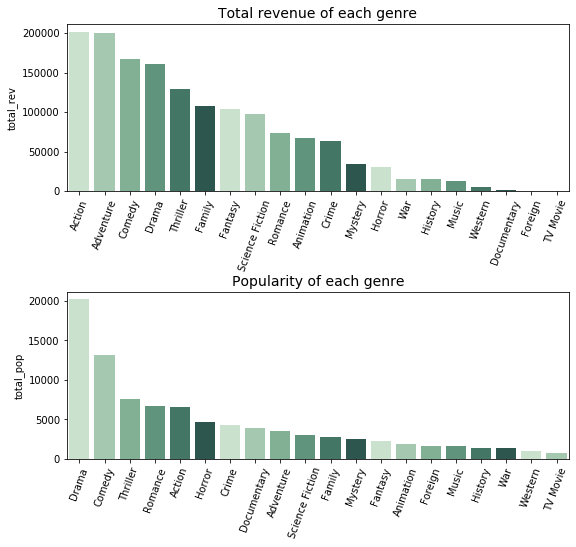

In [47]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (9, 8))
plt.subplots_adjust(hspace = .6)


ax1 = sns.barplot(data = rev_barplot_df, x = rev_barplot_df.index, y = 'total_rev', 
                                                                   palette = sns.color_palette("ch:2.5,-.2,dark=.3"), ax = ax1)
ax1.set_xticklabels(labels = rev_barplot_df.index, rotation = 70)
ax1.set_title('Total revenue of each genre', fontsize = 14)


ax2 = sns.barplot(data = pop_barplot_df, x = pop_barplot_df.index, y = 'total_pop', 
                                                                    palette = sns.color_palette("ch:2.5,-.2,dark=.3"), ax = ax2)
ax2.set_xticklabels(labels = pop_barplot_df.index, rotation = 70)
ax2.set_title('Popularity of each genre', fontsize = 14)


plt.show()

In [48]:
scatter_df = rev_barplot_df.join(pop_barplot_df)

In [49]:
scatter_df.head()

,total_rev,total_pop
Action,201456,6580
Adventure,200080,3485
Comedy,166892,13089
Drama,160842,20185
Thriller,129782,7605


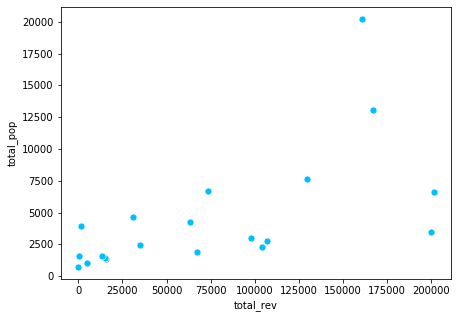

In [50]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = scatter_df, x = 'total_rev', y = 'total_pop', marker = 'o', s = 50, color = 'deepskyblue')
plt.show()

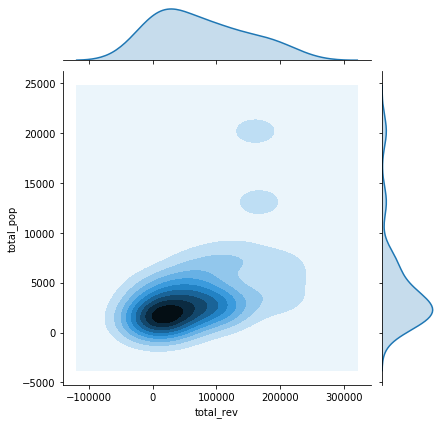

In [51]:
sns.jointplot(data = scatter_df, x = 'total_rev', y = 'total_pop', kind = 'kde')
plt.show()

## Categorical analysis

In [52]:
df.head()

,budget,movieId,popularity,production_companies,release_date,revenue,runtime,title,release_year,Drama,Comedy,Action,Documentary,Horror,Crime,Thriller,Adventure,Romance,Animation,Fantasy,Science Fiction,Mystery,Family,Music,Western,TV Movie,War,History,Foreign
0,30.0,862,22.0,other,1995-10-30,373.55,81.0,Toy Story,1995,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,65.0,8844,17.0,other,1995-12-15,262.80,104.0,Jumanji,1995,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,0.0,15602,12.0,Warner Bros.,1995-12-22,0.00,101.0,Grumpier Old Men,1995,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,16.0,31357,4.0,Twentieth Century Fox Film Corporation,1995-12-22,81.45,127.0,Waiting to Exhale,1995,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,11862,8.0,other,1995-02-10,76.58,106.0,Father of the Bride Part II,1995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
#Company's mean revenue of all time

comp_mean_rev = pd.DataFrame(df.groupby(['production_companies'])['revenue'].mean()).sort_values(by = 'revenue', 
                                                                                                 ascending = False)
comp_mean_rev['revenue'] = comp_mean_rev['revenue'].round(2)
comp_mean_rev

,revenue
production_companies,
Universal Pictures,63.38
Twentieth Century Fox Film Corporation,54.91
Paramount Pictures,46.81
Warner Bros.,46.78
Metro-Goldwyn-Mayer (MGM),11.51
other,7.19


In [54]:
comp_mean_rev.rename(index = {'Twentieth Century Fox Film Corporation': '20th Century Fox',
                             'Metro-Goldwyn-Mayer (MGM)': 'Metro Goldwyn Mayer'}, inplace = True)

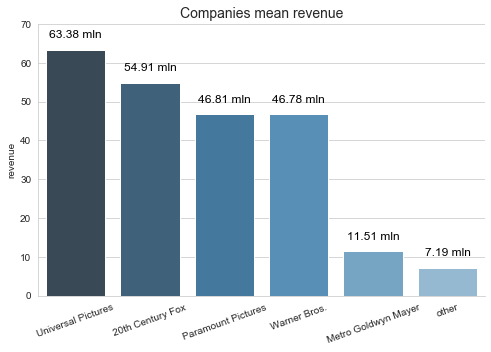

In [61]:
plt.figure(figsize = (8,5))


comp_mean_rev_barplot = sns.barplot(data = comp_mean_rev, x = ['Universal Pictures', '20th Century Fox', 'Paramount Pictures',
       'Warner Bros.', 'Metro Goldwyn Mayer', 'other'], y = 'revenue', palette = sns.color_palette('Blues_d'))
comp_mean_rev_barplot.set_title('Companies mean revenue', fontsize = 14)
comp_mean_rev_barplot.set_ylim((0,70))
sns.set_style('whitegrid')
sns.despine()

inter = iter(range(6))

for index, row in comp_mean_rev.iterrows():
    comp_mean_rev_barplot.text(y = row.revenue, x = next(inter), s = str(row.revenue) + ' mln'+'\n', 
                                                                                    color='black', ha="center", fontsize = 12)


plt.xticks(rotation = 20)
plt.show()

In [56]:
#Companiy's total revenue per year
#Just for convenience I'll plot info only for 2000s

comp_rev = df[['production_companies', 'release_year', 'revenue']].loc[df['release_year'] > 2000]

In [57]:
comp_rev_annual = comp_rev.loc[comp_rev['production_companies'] == 'Warner Bros.'].groupby(['release_year']).sum()
comp_rev_annual.reset_index(inplace = True)

In [58]:
production_companies = list(df['production_companies'].unique())

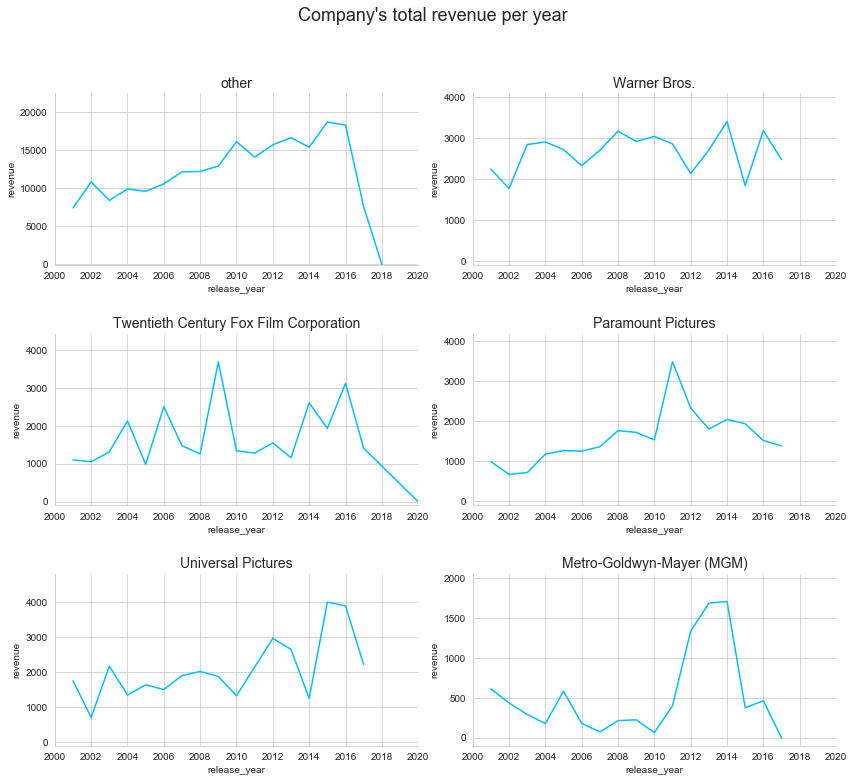

In [59]:
fig, axis = plt.subplots(3,2, figsize = (14, 12))
plt.subplots_adjust(hspace = 0.4, wspace = 0.15)
plt.suptitle('Company\'s total revenue per year', fontsize = 18)

axis = axis.ravel()
sns.set_style('whitegrid')
sns.despine()


for i in range(6):
    
    comp_rev_annual = comp_rev.loc[comp_rev['production_companies'] == production_companies[i]].groupby(['release_year']).sum()
    comp_rev_annual.reset_index(inplace = True)
    
    lineplot = sns.lineplot(x = 'release_year', y = 'revenue', data = comp_rev_annual, ax = axis[i], color = 'deepskyblue', 
                                                                                                                linewidth = 1.5)
    lineplot.set_title(production_companies[i], fontsize = 14)
    lineplot.set_xlim((2000, 2020))
    lineplot.set_xticks(list(range(2000, 2021, 2)))
    lineplot.set_ylim((-100, comp_rev_annual['revenue'].max() * 1.2))

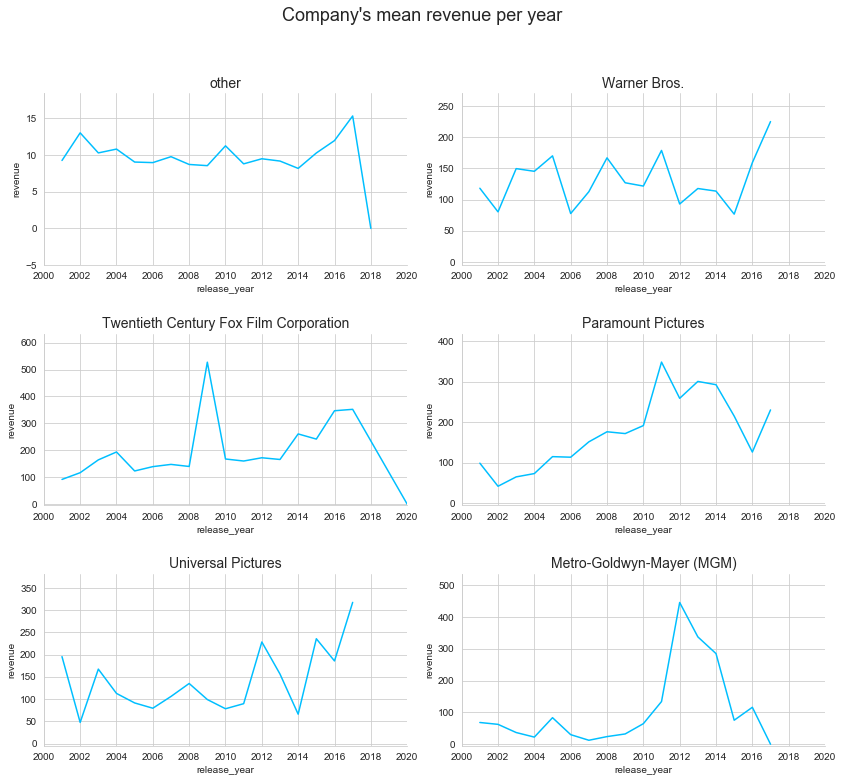

In [60]:
#Companiy's mean revenue per year


fig, axis = plt.subplots(3,2, figsize = (14, 12))
plt.subplots_adjust(hspace = 0.4, wspace = 0.15)
plt.suptitle("Company's mean revenue per year", fontsize = 18)

axis = axis.ravel()
sns.set_style('whitegrid')
sns.despine()



for i in range(6):
    
    comp_rev_annual = comp_rev.loc[comp_rev['production_companies'] == production_companies[i]].groupby(['release_year']).mean()
    comp_rev_annual.reset_index(inplace = True)
    
    lineplot = sns.lineplot(x = 'release_year', y = 'revenue', data = comp_rev_annual, ax = axis[i], color = 'deepskyblue',
                                                                                                               linewidth = 1.5)
    lineplot.set_title(production_companies[i], fontsize = 14)
    lineplot.set_xlim((2000, 2020))
    lineplot.set_xticks(list(range(2000, 2021, 2)))
    lineplot.set_ylim((-5, comp_rev_annual['revenue'].max() * 1.2))